<a href="https://colab.research.google.com/github/chaulagai2001/Speech_recognition/blob/main/model2_training_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa as lr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pickle as pk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from collections import defaultdict

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:

X_train = np.load('train_data/X_train.npy')
y_train = np.load('train_data/y_train.npy')

# Load testing data
X_test = np.load('test_data/X_test.npy')
y_test = np.load('test_data/y_test.npy')

# Load validation data
X_val = np.load('val_data/X_val.npy')
y_val= np.load('val_data/y_val.npy')

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from keras.regularizers import l2

model2 = Sequential()

# Convolutional layers (unchanged)
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(13, 32, 1)))
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(GlobalAveragePooling2D())

# Dense layers with decreased regularization
model2.add(Dense(512, activation='relu', kernel_regularizer=l2(0.005)))  # Reduced L2 from 0.01 to 0.005
model2.add(Dropout(0.25))  # Reduced Dropout from 0.5 to 0.25
model2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.005)))
model2.add(Dropout(0.25))
model2.add(Dense(64, activation='relu', kernel_regularizer=l2(0.005)))
model2.add(Dropout(0.25))

# Output layer (unchanged)
model2.add(Dense(30, activation='softmax'))

model2.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 11, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 28, 64)         18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 4, 14, 64)         0         
 D)                                                              
                                                                 
 global_average_pooling2d (  (None, 64)                0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               33280     
                                                                 
 dropout (Dropout)           (None, 512)              

In [ ]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val_reshaped = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)
print(X_train_reshaped.shape)
print(X_val_reshaped.shape)

(37664, 13, 32, 1)
(2093, 13, 32, 1)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'y_train' contains your string labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

def learning_rate_scheduler(epoch, lr):
    return lr * np.exp(-0.1)

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model with the initial learning rate
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
model2.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model with early stopping and a learning rate scheduler
hist2 = model2.fit(X_train, y_train_encoded, epochs=30, validation_data=(X_val, y_val),
                 callbacks=[LearningRateScheduler(learning_rate_scheduler), early_stopping])


Epoch 1/30


1177/1177 [==============================] - 25s 18ms/step - loss: 2.7711 - accuracy: 0.3044 - val_loss: 1.5278 - val_accuracy: 0.5858 - lr: 9.0484e-04
Epoch 2/30
1177/1177 [==============================] - 21s 18ms/step - loss: 1.2615 - accuracy: 0.6886 - val_loss: 0.8777 - val_accuracy: 0.8313 - lr: 8.1873e-04
Epoch 3/30
1177/1177 [==============================] - 20s 17ms/step - loss: 0.9108 - accuracy: 0.8036 - val_loss: 0.6531 - val_accuracy: 0.8987 - lr: 7.4082e-04
Epoch 4/30
1177/1177 [==============================] - 21s 17ms/step - loss: 0.7418 - accuracy: 0.8558 - val_loss: 0.5527 - val_accuracy: 0.9259 - lr: 6.7032e-04
Epoch 5/30
1177/1177 [==============================] - 21s 18ms/step - loss: 0.6280 - accuracy: 0.8891 - val_loss: 0.4704 - val_accuracy: 0.9431 - lr: 6.0653e-04
Epoch 6/30
1177/1177 [==============================] - 21s 18ms/step - loss: 0.5491 - accuracy: 0.9087 - val_loss: 0.4264 - val_accuracy: 0.9527 - lr: 5.4881e-04
Epoch 7/30
1177/1177

In [ ]:
model2.save('model_tuned_2.keras')

In [ ]:
history_df = pd.DataFrame(hist2.history)
history_df.to_csv("history3.csv", index=False)

In [ ]:
predict=model2.predict(X_test)
predict[0]

66/66 [==============================] - 1s 7ms/step


array([1.9618112e-16, 5.2971075e-18, 1.4502447e-13, 4.1473337e-21,
       2.8014095e-16, 2.5142446e-08, 5.9295644e-07, 2.5164980e-13,
       3.4025622e-21, 1.1479312e-14, 1.2955298e-10, 2.3475533e-10,
       1.3540378e-16, 3.4853858e-09, 1.2078678e-15, 4.4629817e-16,
       8.7414237e-17, 6.1171122e-09, 1.8880667e-12, 9.4927508e-08,
       1.6219210e-06, 8.0751885e-09, 1.9335396e-10, 2.0861340e-04,
       9.9978870e-01, 1.3978659e-10, 6.1001652e-26, 9.4409327e-15,
       3.1444688e-07, 2.1485456e-09], dtype=float32)

In [ ]:
predicted_labels = [np.argmax(row) for row in predict]
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predicted_labels
})
df_comparison

,Actual,Predicted
0,24,24
1,25,25
2,6,6
3,24,24
4,16,16
...,...,...
2087,16,16
2088,10,10
2089,19,19
2090,9,9


In [ ]:
df_csv = df_comparison.to_csv('df_comparison_csv.csv', index = False)

In [ ]:
label_csv = 'label.csv'
label = pd.read_csv(label_csv)
label

,Files
0,bed
1,bird
2,cat
3,dog
4,down
5,eight
6,five
7,four
8,go
9,happy


In [ ]:
df_comparison['Match_Status'] = np.where(df_comparison['Actual'] == df_comparison['Predicted'], 'Match', 'Mismatch')
df_comparison

,Actual,Predicted,Match_Status
0,24,24,Match
1,25,25,Match
2,6,6,Match
3,24,24,Match
4,16,16,Match
...,...,...,...
2087,16,16,Match
2088,10,10,Match
2089,19,19,Match
2090,9,9,Match


In [ ]:
match_mismatch_counts = df_comparison['Match_Status'].value_counts()

# Display the counts
print(match_mismatch_counts)

Match       2059
Mismatch      33
Name: Match_Status, dtype: int64


In [ ]:
df_comparison['Match_Status'] = np.where(df_comparison['Actual'] == df_comparison['Predicted'], 'Match', 'Mismatch')

# Group by 'Actual' and count the occurrences of 'Match' and 'Mismatch'
count_result = df_comparison.groupby(['Actual', 'Match_Status']).size().unstack(fill_value=0)

# Rename columns for better clarity
count_result.columns = ['Match', 'Mismatch']

# Reset index to make 'Actual' a regular column
count_result.reset_index(inplace=True)

# Print the result
count_result

,Actual,Match,Mismatch
0,0,66,4
1,1,59,5
2,2,56,1
3,3,75,1
4,4,47,2
5,5,54,0
6,6,62,1
7,7,125,1
8,8,48,1
9,9,89,1


In [ ]:
# Merge the DataFrames based on their index
merged_df = pd.merge(count_result, label, left_index=True, right_index=True)

# Print the merged DataFrame
print(merged_df)

    Actual  Match  Mismatch   Files
0        0     66         4     bed
1        1     59         5    bird
2        2     56         1     cat
3        3     75         1     dog
4        4     47         2    down
5        5     54         0   eight
6        6     62         1    five
7        7    125         1    four
8        8     48         1      go
9        9     89         1   happy
10      10    109         0   house
11      11     74         1    left
12      12     61         0  marvel
13      13     62         0    nine
14      14     44         1      no
15      15    103         1     off
16      16    110         1      on
17      17     61         2     one
18      18     70         0   right
19      19     70         1   seven
20      20     64         0  sheila
21      21     79         0     six
22      22     71         1    stop
23      23     51         1   three
24      24     54         0    tree
25      25     41         2     two
26      26     61         1 

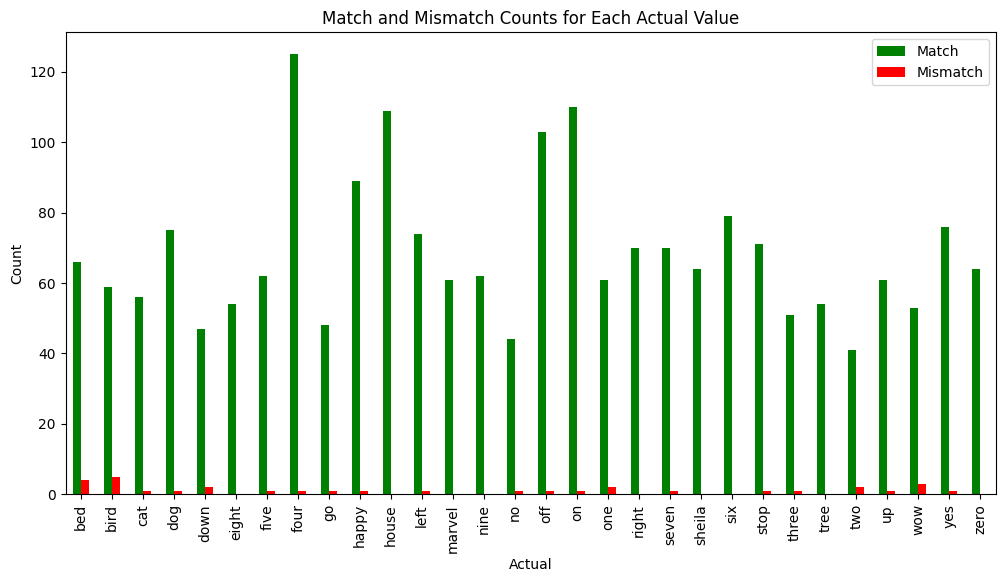

In [ ]:
import matplotlib.pyplot as plt

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the 'Match' and 'Mismatch' columns for each 'Actual' value
merged_df.plot(x='Files', y=['Match', 'Mismatch'], kind='bar', ax=ax, color=['green', 'red'])

# Adding labels and title
plt.xlabel('Actual')
plt.ylabel('Count')
plt.title('Match and Mismatch Counts for Each Actual Value')

# Adding legend
plt.legend(["Match", "Mismatch"])

# Show the plot
plt.show()


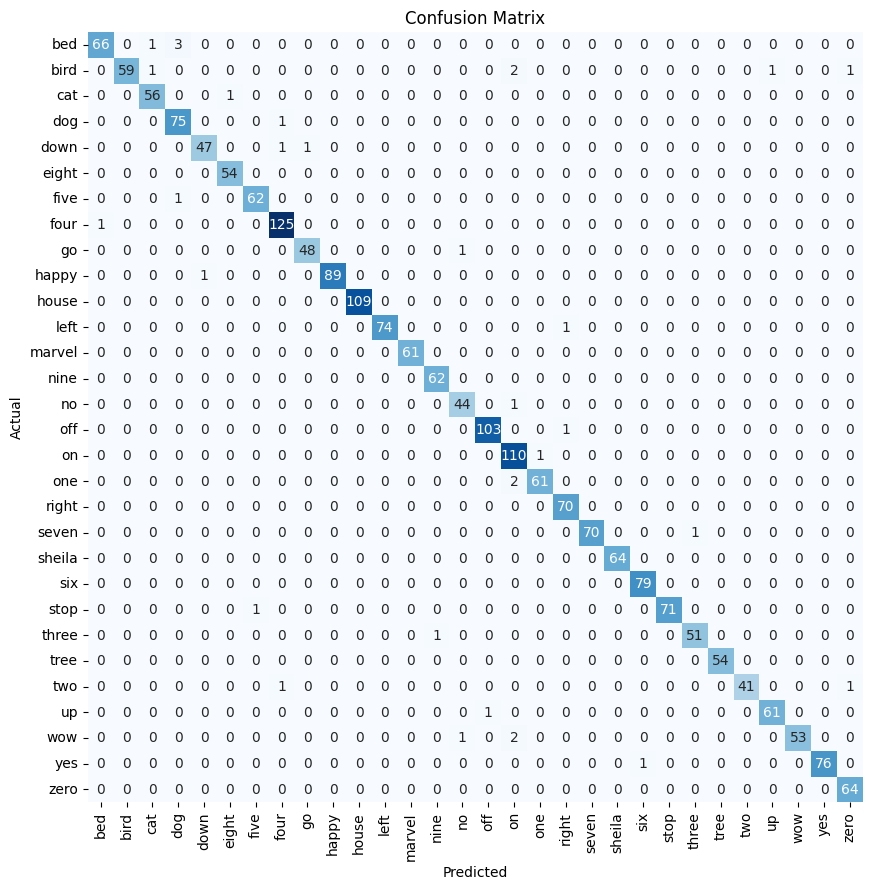

In [ ]:
# Create the 'Match_Status' column
df_comparison['Match_Status'] = np.where(df_comparison['Actual'] == df_comparison['Predicted'], 'Match', 'Mismatch')

# Generate the confusion matrix
conf_matrix = confusion_matrix(df_comparison['Actual'], df_comparison['Predicted'])

# Convert the confusion matrix to a DataFrame for better visualization
conf_df = pd.DataFrame(conf_matrix, index=label['Files'], columns=label['Files'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
df_comparison['Match_Status'] = np.where(df_comparison['Actual'] == df_comparison['Predicted'], 'Match', 'Mismatch')

# Generate the classification report
class_report = classification_report(df_comparison['Actual'], df_comparison['Predicted'], target_names=label['Files'])

# Print the classification report
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

         bed       0.99      0.94      0.96        70
        bird       1.00      0.92      0.96        64
         cat       0.97      0.98      0.97        57
         dog       0.95      0.99      0.97        76
        down       0.98      0.96      0.97        49
       eight       0.98      1.00      0.99        54
        five       0.98      0.98      0.98        63
        four       0.98      0.99      0.98       126
          go       0.98      0.98      0.98        49
       happy       1.00      0.99      0.99        90
       house       1.00      1.00      1.00       109
        left       1.00      0.99      0.99        75
      marvel       1.00      1.00      1.00        61
        nine       0.98      1.00      0.99        62
          no       0.96      0.98      0.97        45
         off       0.99      0.99      0.99       104
          on       0.94      0.99      0.96       111
   